In [1]:
import numpy as np
from mayavi import mlab
import matplotlib.pyplot as plt
import pickle
import horus as ho

In [11]:
from simsopt.configs import get_w7x_data
curves, currents, ma = get_w7x_data()

In [3]:
from simsopt.geo import SurfaceRZFourier
s = SurfaceRZFourier.from_nphi_ntheta(
    mpol=5,
    ntor=5,
    stellsym=True,
    nfp=3,
    range="full torus",
    nphi=64,
    ntheta=24,
)
s.fit_to_curve(ma, 1.5, flip_theta=False)

In [12]:
s.plot(engine="mayavi", show=False, opacity=0.5)

for coil in coils:
    coil.plot(engine="mayavi", show=False)

mlab.show()

In [4]:
default_config = [curr.current for curr in currents]

In [6]:
from simsopt.field import Current, coils_via_symmetries
# GYM00+1750
currents = [Current(1.109484 * 1e6) for _ in range(5)]
currents.append(Current(-0.3661 * 1e6))
currents.append(Current(-0.3661 * 1e6))

gym_config = [curr.current for curr in currents]

# # 
# currents = [Current(1.109484) * 1e6 for _ in range(5)]
# currents.append(Current(-0.3661) * 1e6)
# currents.append(Current(-0.3661) * 1e6)

# currents = [Current(1.109484) * 1e6 for _ in range(5)]
# currents.append(Current(-0.3661) * 1e6)
# currents.append(Current(-0.3661) * 1e6)

In [8]:
scaling = 1
currents = [Current((1-scaling)*currD + scaling*currG) for currD, currG in zip(default_config, gym_config)]

In [9]:
print("Default config: ", default_config)
print("Gym config: ", gym_config)
print("Actual config: ", [curr.current for curr in currents])

Default config:  [1620000.0, 1620000.0, 1620000.0, 1620000.0, 1620000.0, 0.0, 0.0]
Gym config:  [1109484.0, 1109484.0, 1109484.0, 1109484.0, 1109484.0, -366100.0, -366100.0]
Actual config:  [1109484.0, 1109484.0, 1109484.0, 1109484.0, 1109484.0, -366100.0, -366100.0]


In [13]:
coils = coils_via_symmetries(curves, currents, 5, True)

In [15]:
from pyoculus.problems import SimsoptBfieldProblem, surf_from_coils

In [18]:
surf = surf_from_coils(coils, ncoils=7, mpol=5, ntor=5)

{'ncoils': 7, 'mpol': 5, 'ntor': 5}


In [19]:
surf.plot(engine="mayavi", show=False, opacity=0.5)

for coil in coils:
    coil.plot(engine="mayavi", show=False)

mlab.show()

: 

In [16]:
R0, _, Z0 = ma.gamma()[0,:]
ps = SimsoptBfieldProblem.from_coils(R0=R0, Z0=Z0, Nfp=5, coils=coils, surf=s)

In [19]:
R0, _, Z0 = ma.gamma()[0,:]
ps = SimsoptBfieldProblem.from_coils(R0=R0, Z0=Z0, Nfp=5, coils=coils, interpolate=True, ncoils=7, mpol=7, ntor=7, n=40)

{'ncoils': 7, 'mpol': 7, 'ntor': 7, 'n': 40}


In [ ]:
ps._mf_B.estimate_error_B(10000)

In [ ]:
ps._mf_B.estimate_error_GradAbsB(1000)

#### Plot the current difference

In [ ]:
curr_diff = []
for actual, base in zip(currents,  w7x[1]):
    print(base.current, " | ", actual.current_to_scale.current * 1e6)
    curr_diff.append(actual.current_to_scale.current * 1e6 - base.current)

In [ ]:
curr_diff

In [ ]:
cmap = plt.colormaps['RdBu']
norm = plt.Normalize(min(curr_diff), max(curr_diff))
colors = cmap(norm(curr_diff))
colors = colors[:, :3]

In [ ]:
def rep(data):
            if close:
                return np.concatenate((data, [data[0]]))
            else:
                return data

In [ ]:
# Assuming curr_diff is a list of differences in currents
# Normalize curr_diff to the range [0, 1] for coloring

# Plot the coils
for i, coil in enumerate(coils):
    c


mlab.colorbar(orientation='vertical', title='Current Difference')
mlab.show()

In [ ]:
from mayavi import mlab
for i, coil in enumerate(coils):
    coil.plot(engine="mayavi", show=False, color=tuple(colors[i%7]))

# get the current lut manager
mlab.colorbar(orientation='vertical', title='Current Difference')
mlab.show()

#### Poincare

In [ ]:
for coil in coils:
    coil.plot(engine="mayavi", show=False)

mlab.show()

In [ ]:
phis = [0]    #[(i / 4) * (2 * np.pi / nfp) for i in range(4)]

nfieldlines = 1
Rs = np.linspace(6.05, 6.2, nfieldlines)
Zs = [ma.gamma()[0, 2] for _ in range(nfieldlines)]
RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

nfieldlines = 2
p1 = np.array([5.6144507858315915, -0.8067790944375764])
p2 = np.array([5.78, -0.6])
Rs = np.linspace(p1[0], p2[0], nfieldlines)
Zs = np.linspace(p1[1], p2[1], nfieldlines)
Rs, Zs = np.meshgrid(Rs, Zs)
RZs2 = np.array([[r, z] for r, z in zip(Rs.flatten(), Zs.flatten())])

RZs = np.concatenate((RZs, RZs2))

In [ ]:
ax.plot(RZs[:, 0], RZs[:, 1], '+')
fig

In [ ]:
tys, phis = ho.poincare(bsh, RZs, phis, sc_fieldline, tol = 1e-10, plot=False)

In [ ]:
_, _, fig, ax = ho.poincare(bsh, RZs, phis, sc_fieldline, tol = 1e-10)

In [ ]:
for col in ax[0,0].collections:
    col.set_color('black')
    col.set_sizes([0.5])

In [ ]:
fig

In [ ]:
# import pickle
# pickle.dump(fig, open("../output/poincare_GYM000+1750_chaotic_black.pickle", "wb"))

#### Finding fix-point

In [31]:
fig = pickle.load(open("../../runs/w7x-gym00-1750/W7X_GYM000-1750_poincare_black.pkl", "rb"))
ax = fig.get_axes()[0]
plt.show()

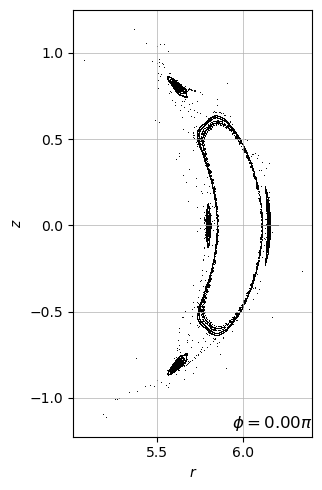

In [32]:
fig

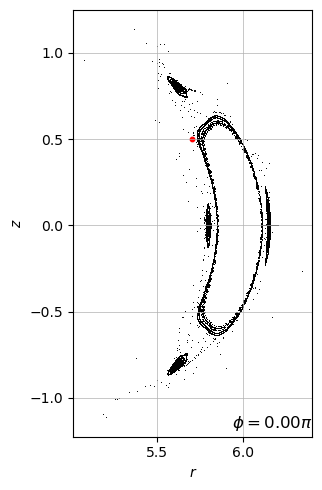

In [33]:
# guess = [5.6, 0.8] # O point
guess = [5.7, 0.5] # X point
# guess = [5.78, -0.6]
ax.scatter(guess[0], guess[1], c='r', s=10)
fig

In [ ]:
gamma = ho.trace(ps._mf, 40*2*np.pi, [5.72, 0, 0.68], tol=1e-9)

In [ ]:
from mayavi import mlab
for coil in coils:
    coil.plot(engine="mayavi", show=False)

mlab.plot3d(gamma[0, :], gamma[1, :], gamma[2, :], tube_radius=0.01, color=(0, 0, 1))

mlab.show()

In [34]:
from pyoculus.problems import FixedPoint

In [35]:
# set up the integrator
iparams = dict()
iparams["rtol"] = 1e-12

pparams = dict()
pparams["nrestart"] = 0
pparams["tol"] = 1e-18
pparams['niter'] = 100

fp = FixedPoint(ps, pparams, integrator_params=iparams)

In [36]:
fp.compute(guess=[5.69956997 0.52560335], pp=5, qq=4, sbegin=5.2, send=6.2, checkonly=True)

0 - [DeltaR, DeltaZ] : [ 0.01067771 -0.06341709] - dtheta : 0.14865421704473425
0 - [StepR, StepZ]: [-0.0181231   0.05665339]
1 - RZ : [5.6818769  0.55665339] - rhotheta : [0.6172635  2.01765653]
1 - [DeltaR, DeltaZ] : [ 0.01083827 -0.02350714] - dtheta : 0.08381242786902598
1 - [StepR, StepZ]: [ 0.01740229 -0.0295264 ]
2 - RZ : [5.69927919 0.52712699] - rhotheta : [0.58312357 2.01262481]
2 - [DeltaR, DeltaZ] : [0.00032629 0.00093293] - dtheta : 0.0821599743680892
2 - [StepR, StepZ]: [ 0.00026283 -0.00146953]
3 - RZ : [5.69954203 0.52565746] - rhotheta : [0.5816829  2.01329659]
3 - [DeltaR, DeltaZ] : [ 1.73174147e-05 -3.21407955e-05] - dtheta : 0.08399502336201614
3 - [StepR, StepZ]: [ 2.79426029e-05 -5.41015638e-05]
4 - RZ : [5.69956997 0.52560336] - rhotheta : [0.58162205 2.01329301]
4 - [DeltaR, DeltaZ] : [6.04652328e-10 4.24091118e-09] - dtheta : 0.08400228767039364
4 - [StepR, StepZ]: [ 2.52374122e-10 -3.83758947e-09]
5 - RZ : [5.69956997 0.52560335] - rhotheta : [0.58162204 2.013

In [ ]:
results = [list(p) for p in zip(fp.x, fp.y, fp.z)]

In [ ]:
results

In [ ]:
for rr in results:
    ax.scatter(rr[0], rr[2], marker="X", edgecolors="black", linewidths=1)
fig

#### Tracing stable and unstable manifolds

In [38]:
fp_x1 = FixedPoint(ps, pparams, integrator_params=iparams)
fp_x2 = FixedPoint(ps, pparams, integrator_params=iparams)

fp_x1.compute(guess=[5.69956997, 0.52560335], pp=5, qq=4, sbegin=5.2, send=6.2, checkonly=True)
fp_x2.compute(guess=[5.883462104879646, 0.6556749703570318], pp=5, qq=4, sbegin=5.2, send=6.2, checkonly=True)

0 - [DeltaR, DeltaZ] : [-6.54552856e-10 -6.48547227e-09] - dtheta : 0.0840023028364012
0 - [StepR, StepZ]: [-1.76987314e-11  4.84256191e-09]
1 - RZ : [5.69956997 0.52560335] - rhotheta : [0.58162204 2.01329301]
1 - [DeltaR, DeltaZ] : [-4.35207426e-14  2.03170814e-14] - dtheta : 0.08400229393363512
0 - [DeltaR, DeltaZ] : [-1.00195408e-09  1.26540922e-09] - dtheta : 0.021447542892923943
0 - [StepR, StepZ]: [ 7.52290674e-10 -8.46452131e-10]
1 - RZ : [5.88346211 0.65567497] - rhotheta : [0.65890444 1.6698446 ]
1 - [DeltaR, DeltaZ] : [ 4.08562073e-14 -4.64073224e-14] - dtheta : 0.021447541283128313


In [40]:
from pyoculus.solvers import Manifold

In [41]:
iparam = dict()
iparam["rtol"] = 1e-13

mp = Manifold(ps, fp_x1, fp_x2, integrator_params=iparam)
mp.choose(signs=[[1, -1], [-1, 1]], order=False)

In [ ]:
histories = mp.outer["clinic_history"]
marker = ['d', 's']
colors = ['tab:blue', 'tab:orange']

clinics = mp.outer["clinics"]
ax.scatter(*clinics[0][-1], marker=marker[0], color=colors[0], edgecolor='grey', zorder=13)
ax.scatter(*clinics[1][-1], marker=marker[1], color=colors[1], edgecolor='grey', zorder=13)

for jj in range(8):
    for ii in range(2):
        fb = histories[ii][0][jj]
        ax.scatter(*fb, marker=marker[ii], color=colors[ii], edgecolor='grey', zorder=13)
        fb = histories[ii][1][jj]
        ax.scatter(*fb, marker=marker[ii], color=colors[ii], edgecolor='grey', zorder=13)

In [44]:
mp.onworking = mp.outer
mp.find_clinic_single()

KeyboardInterrupt: 

In [5]:
fig = pickle.load(open("../../runs/w7x-gym00-1750/W7X_GYM000-1750_poincare_chaotic_black.pkl", "rb"))
ax = fig.get_axes()[0]

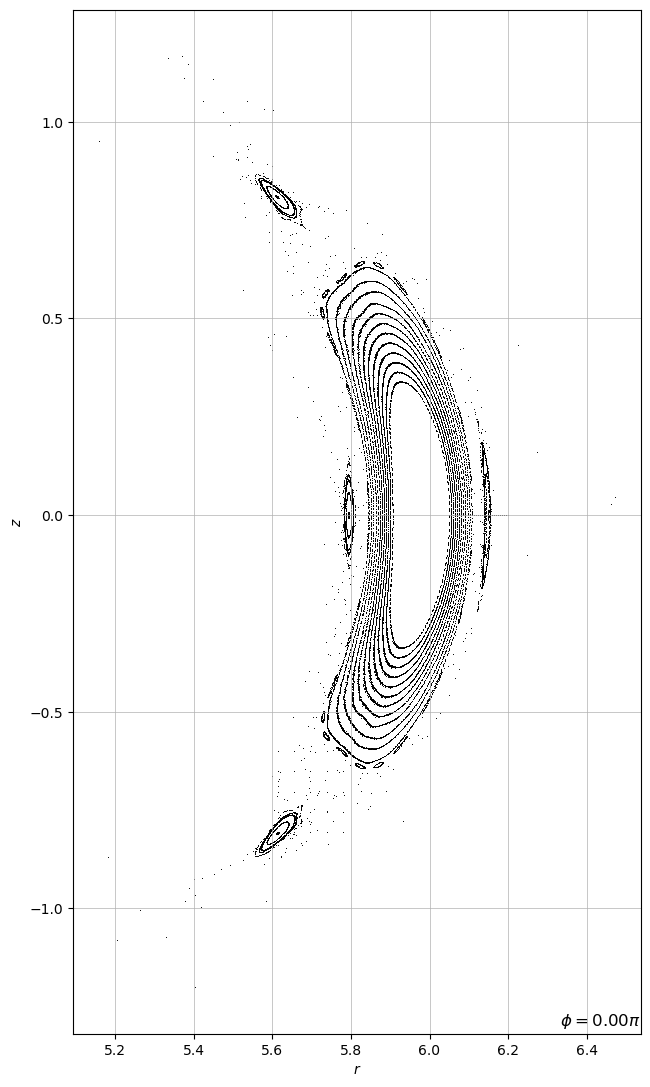

In [6]:
fig.set_size_inches(12, 12)
fig

In [ ]:
from pyoculus.solvers import Manifold

In [ ]:
iparam = dict()
iparam["rtol"] = 1e-12

mp = Manifold(fp, ps, integrator_params=iparam)

In [ ]:
mp.choose(0, 1, ["u+","s+"], [1, 1])

In [ ]:
mp.find_epsilon(mp.rfp_s, mp.vector_s, eps_guess = 1e-2, direction=-1)

In [ ]:
mp.compute(nintersect = 6, epsilon= 1e-3, neps = 50)

In [ ]:
mp.plot(ax=ax)

In [ ]:
fig

In [ ]:
mp.find_epsilon(mp.rfp_u, mp.vector_u)

In [ ]:
mp.error_linear_regime(1e-4, mp.rfp_u, mp.vector_u)

In [ ]:
mp.error_linear_regime(1e-4, mp.rfp_s, mp.vector_s, direction=-1)

In [ ]:
mp.integrate_single(mp.rfp_s, 1, -1, ret_jacobian=False)

In [ ]:
mp.integrate_single(mp.rfp_s, 1, -1, ret_jacobian=True)

In [ ]:
eps_s_1, eps_u_1 = mp.find_homoclinic(1e-4, 1e-4, jac=False)

In [ ]:
fund = mp.fundamental_segment
guess_i = [fund[0][1]*np.power(mp.lambda_s, 1/4), fund[1][0]*np.power(mp.lambda_u, 1/4)]
print(f"initial guess: {guess_i}")

In [ ]:
r1 = mp.integrate_single(mp.rfp_u + guess_i[1] * mp.vector_u, 5, ret_jacobian=False)
r2 = mp.integrate_single(mp.rfp_s + guess_i[0] * mp.vector_s, 5, -1, ret_jacobian=False)

In [ ]:
ax.scatter(*r1, marker="s", edgecolors="black", linewidths=1)
ax.scatter(*r2, marker="o", edgecolors="black", linewidths=1)
fig

In [ ]:
mp.error_linear_regime(guess_i[0], mp.rfp_s, mp.vector_s, direction=-1)

In [ ]:
eps_s_i, eps_u_i = mp.find_homoclinic(*guess_i, bounds = fund, n_s = 5, n_u = 5, jac=False)

In [ ]:
marker = ["P", "o"] #, "s", "p", "P", "*", "X", "D", "d", "^", "v", "<", ">"]
for i, clinic in enumerate(mp.clinics):
    eps_s_i, eps_u_i = clinic[1:3]

    n_u = 8
    # hs_i = mp.integrate(mp.rfp_s + eps_s_i * mp.vector_s, n_s, -1)
    hu_i = mp.integrate(mp.rfp_u + eps_u_i * mp.vector_u, n_u, 1)
    # ax.scatter(hs_i[0,:], hs_i[1,:], marker=marker[i], color="purple", zorder=10)
    ax.scatter(hu_i[0,:], hu_i[1,:], marker=marker[i], color="royalblue", edgecolor='cyan', zorder=10)

In [ ]:
fig

In [ ]:
mp.clinics

In [ ]:
ps.A([6.,0.,0.])

In [ ]:
mp.integrate_single(mp.rfp_u, 1, 1, ret_jacobian=False, integrate_A=True)

In [ ]:
mp.resonance_area()

In [ ]:
mp.fundamental_segment